# Telecom Customer Churn Analysis:

#### Dataset Info: 
    Sample Data Set containing Telco customer data and showing customers
    who has left last month

In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

***Load the data file***

In [2]:
df = pd.read_csv("Churn_Data.csv",)

    Each row represents a customer, each column contains customer’s
    attributes described on the column Metadata.

    The raw data contains 7043 rows (customers) and 21 columns 
    (features).

    The “Churn” column is our target.

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df['Churn'].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [9]:
df['Churn'].value_counts(dropna=False)

No     5174
Yes    1869
Name: Churn, dtype: int64

Text(0.5, 1.02, ' Count of TARGET Variable per category')

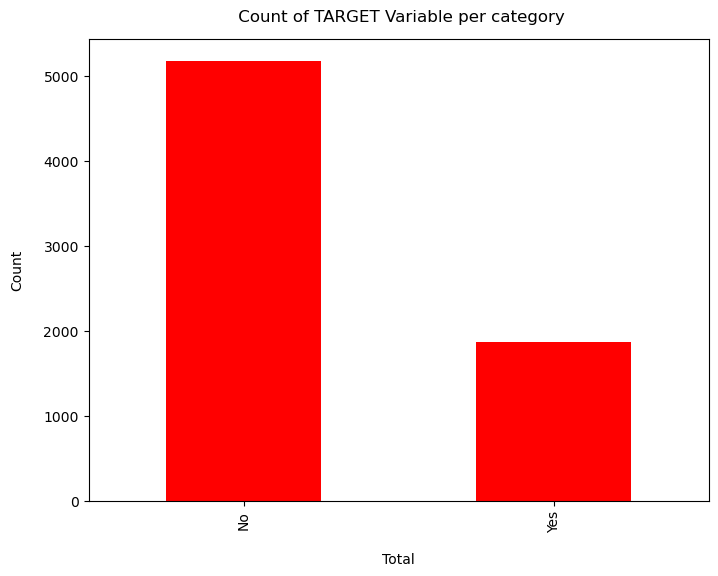

In [10]:
df['Churn'].value_counts().plot(kind ='bar', figsize = (8,6), color  = 'r')
plt.xlabel('Total' , labelpad = 14)
plt.ylabel('Count', labelpad = 14)
plt.title(' Count of TARGET Variable per category', y = 1.02)

### Data is highly imbalanced, ratio = 73:27
### So we analyse the data with other features while taking the target values separately to get some insights.

In [11]:
df.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# DATA CLEANING

In [12]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors = 'coerce')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [15]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

  As we can see there are 11 missing values in TotalCharges column. 
    Let's  check these records

In [16]:
df['TotalCharges'].value_counts(dropna=False,normalize=True)

NaN        0.001562
20.20      0.001562
19.75      0.001278
20.05      0.001136
19.90      0.001136
             ...   
6849.40    0.000142
692.35     0.000142
130.15     0.000142
3211.90    0.000142
6844.50    0.000142
Name: TotalCharges, Length: 6531, dtype: float64

In [17]:
df[df['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [18]:
df.shape

(7043, 21)

In [19]:
df['TotalCharges'].astype(float)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

###  Handling missing Values:

    Since the % of these records compared to total dataset is very low 
    ie   0.15%, it is safe to ignore them from further processing.

In [20]:
df.shape

(7043, 21)

In [21]:
df= df.dropna()

In [22]:
df.shape

(7032, 21)

In [23]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [24]:
df['MonthlyCharges'].unique()        

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [25]:
#df.drop(columns= ['customerID' , 'tenure'], axis = 1, inplace= True)

In [26]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

## Data Exploration
***Plot distibution of individual predictors by churn***

### Data Exploration
***Plot distibution of individual predictors by churn***

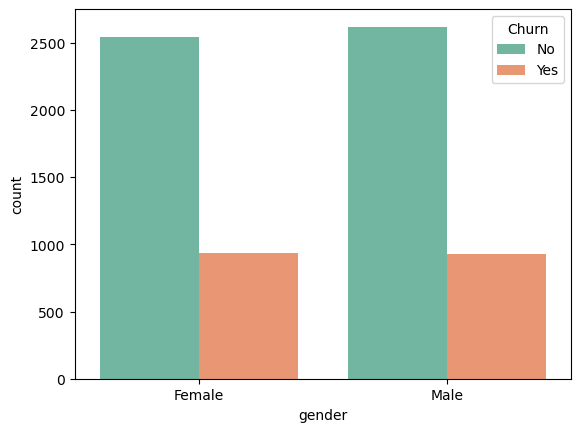

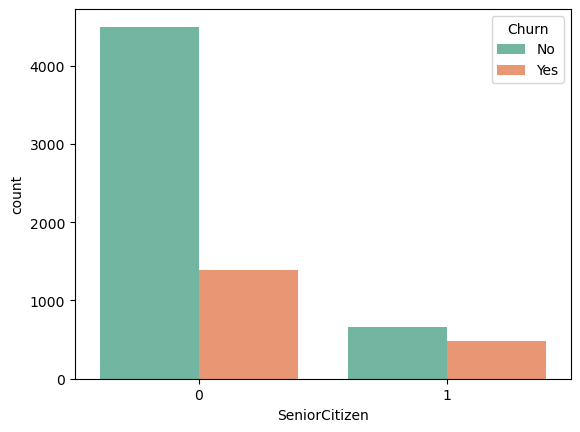

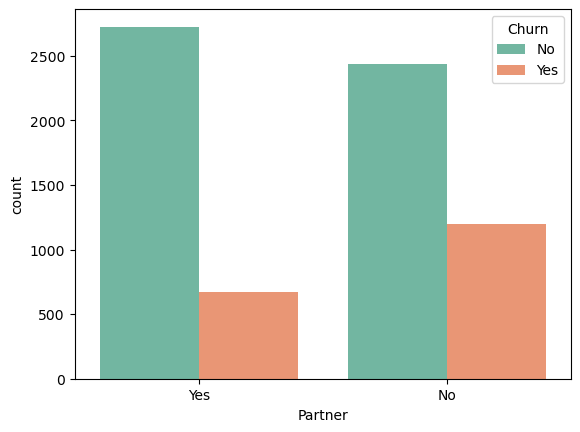

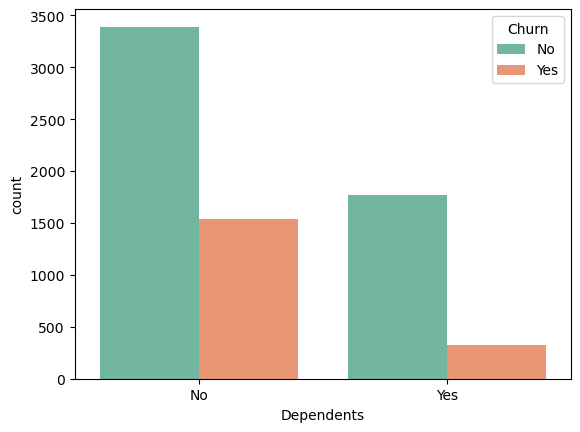

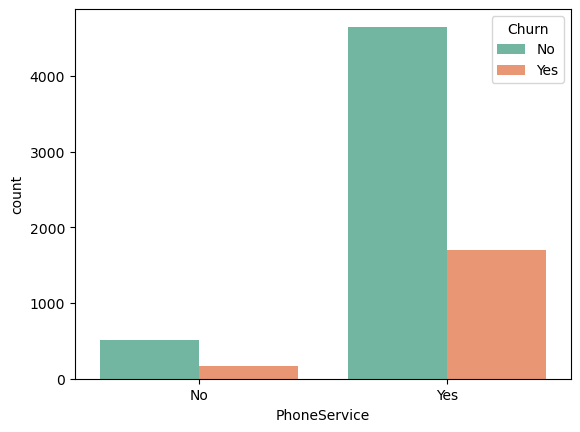

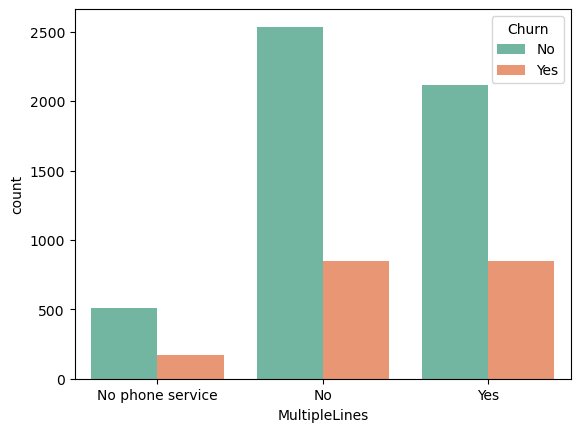

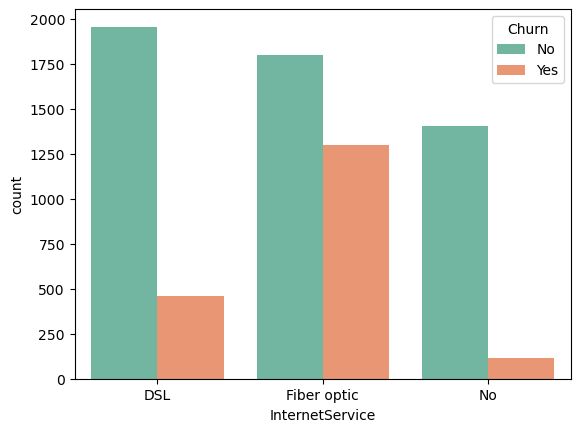

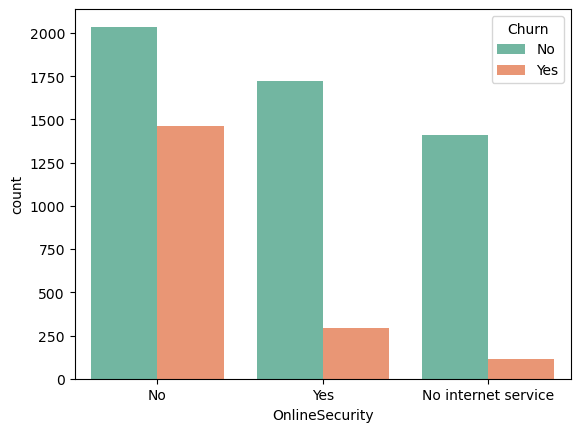

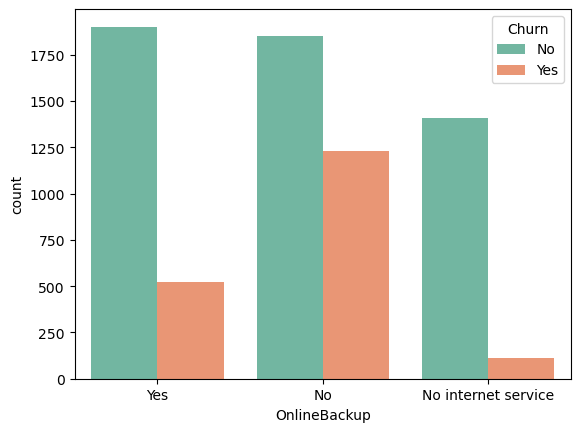

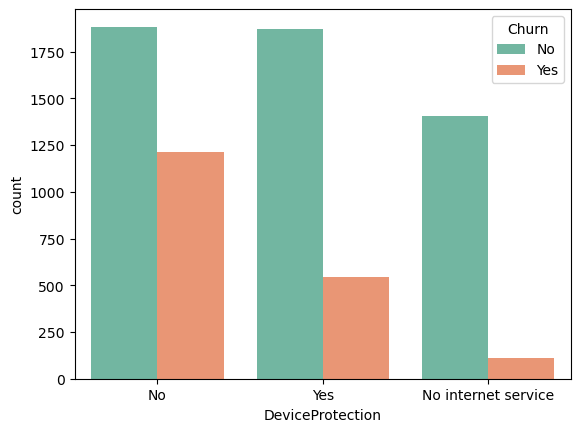

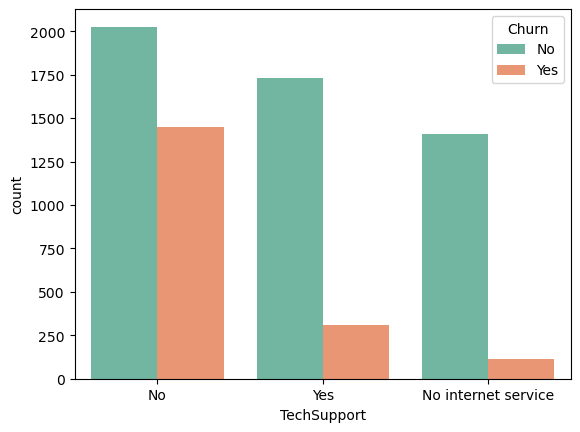

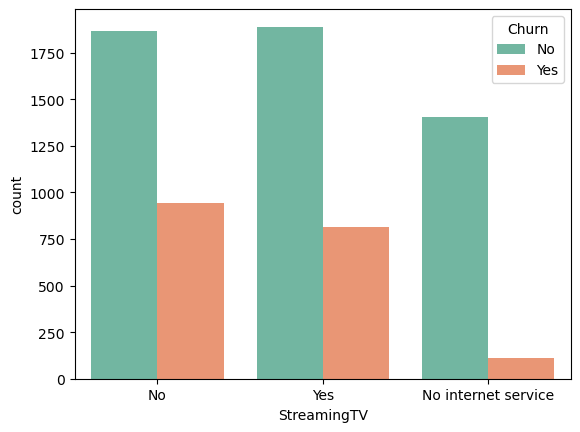

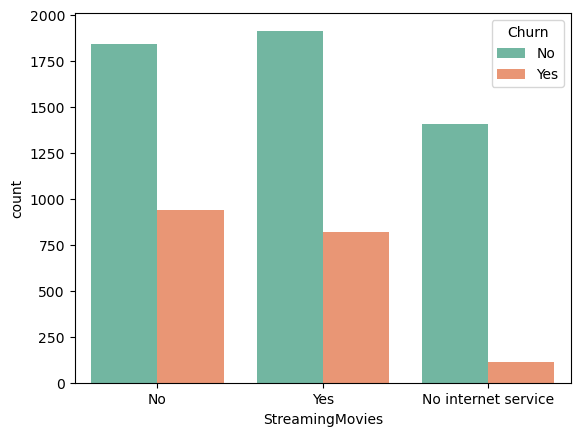

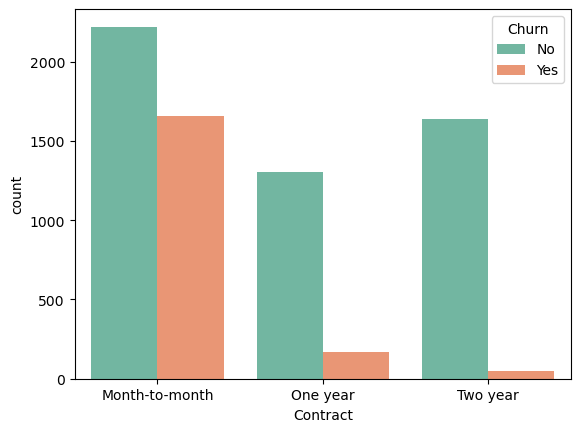

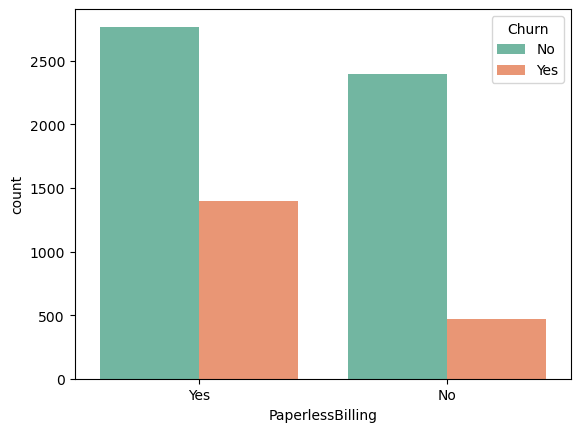

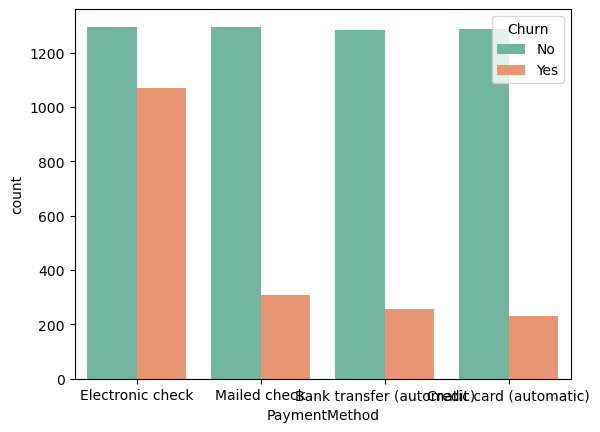

In [27]:
import seaborn as sns

# Define the color palette
colors = sns.color_palette("Set2")

# Loop through the columns and create countplots with color
for i, cols in enumerate(df.drop(columns=['Churn','MonthlyCharges','TotalCharges','customerID','tenure'])):
    plt.figure(i)
    sns.countplot(data=df, x=cols, hue='Churn', palette=colors)


In [28]:
# for i , cols in enumerate(df.drop(columns= ['Churn','MonthlyCharges','TotalCharges','customerID'])):
#     plt.figure(i)
#     sns.countplot(data = df, x = cols, hue= 'Churn')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

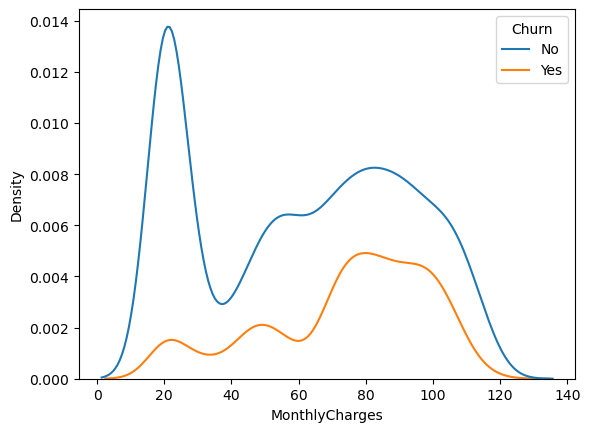

In [29]:
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn')

***Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0***

In [30]:
df['Churn'] = np.where(df.Churn == 'Yes',1,0)


In [31]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


***Convert all the categorical variables into dummy variables***

***Relationship between Monthly Charges and Total Charges***

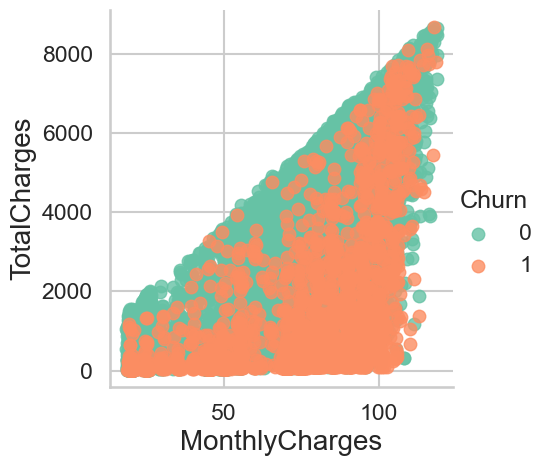

In [49]:
sns.lmplot(data = df, x = 'MonthlyCharges', y = 'TotalCharges',hue ='Churn',fit_reg=False, palette=colors)

Total Charges increase as Monthly Charges increase - as expected.

Text(0.5, 1.0, 'Monthly charges by churn')

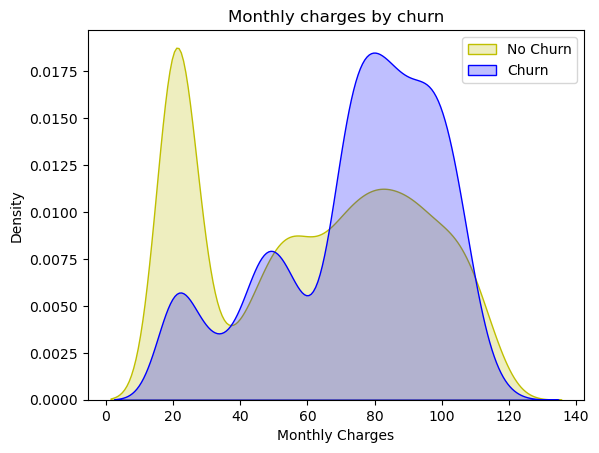

In [33]:
m = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 0)],color = 'y',shade=True)
m = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 1)], color = 'b', shade=True)
m.legend(["No Churn","Churn"],loc='upper right')
m.set_ylabel('Density')
m.set_xlabel('Monthly Charges')
m.set_title('Monthly charges by churn')

**Insight:** Churn is high when Monthly Charges ar high

Text(0.5, 1.0, 'Total charges by churn')

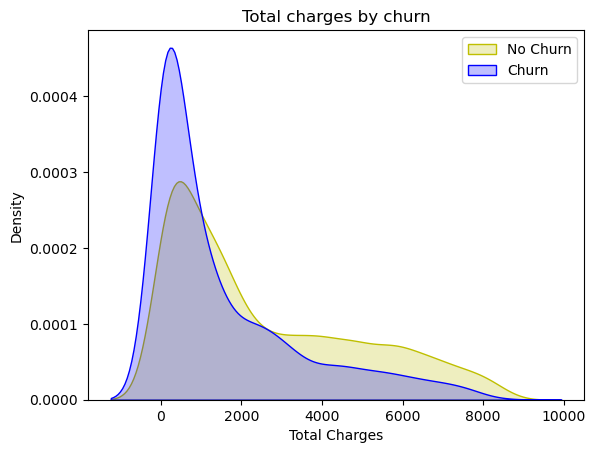

In [36]:
tc = sns.kdeplot(df.TotalCharges[(df["Churn"] == 0)], color = 'y', shade=True)
tc = sns.kdeplot(df.TotalCharges[(df["Churn"] == 1)], color = 'b', shade=True)
tc.legend(["No Churn","Churn"],loc='upper right')
tc.set_ylabel('Density')
tc.set_xlabel('Total Charges')
tc.set_title('Total charges by churn')

**Surprising insight ** as higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz **Higher Monthly Charge**,  **Lower tenure** and **Lower Total Charge** are linkd to **High Churn**.

**Build a corelation of all predictors with 'Churn'**

In [37]:
# plt.figure(figsize=(20,10))
# df_gd.corr()['Churn'].sort_values(ascending=False).plot(kind ='bar')

<AxesSubplot:>

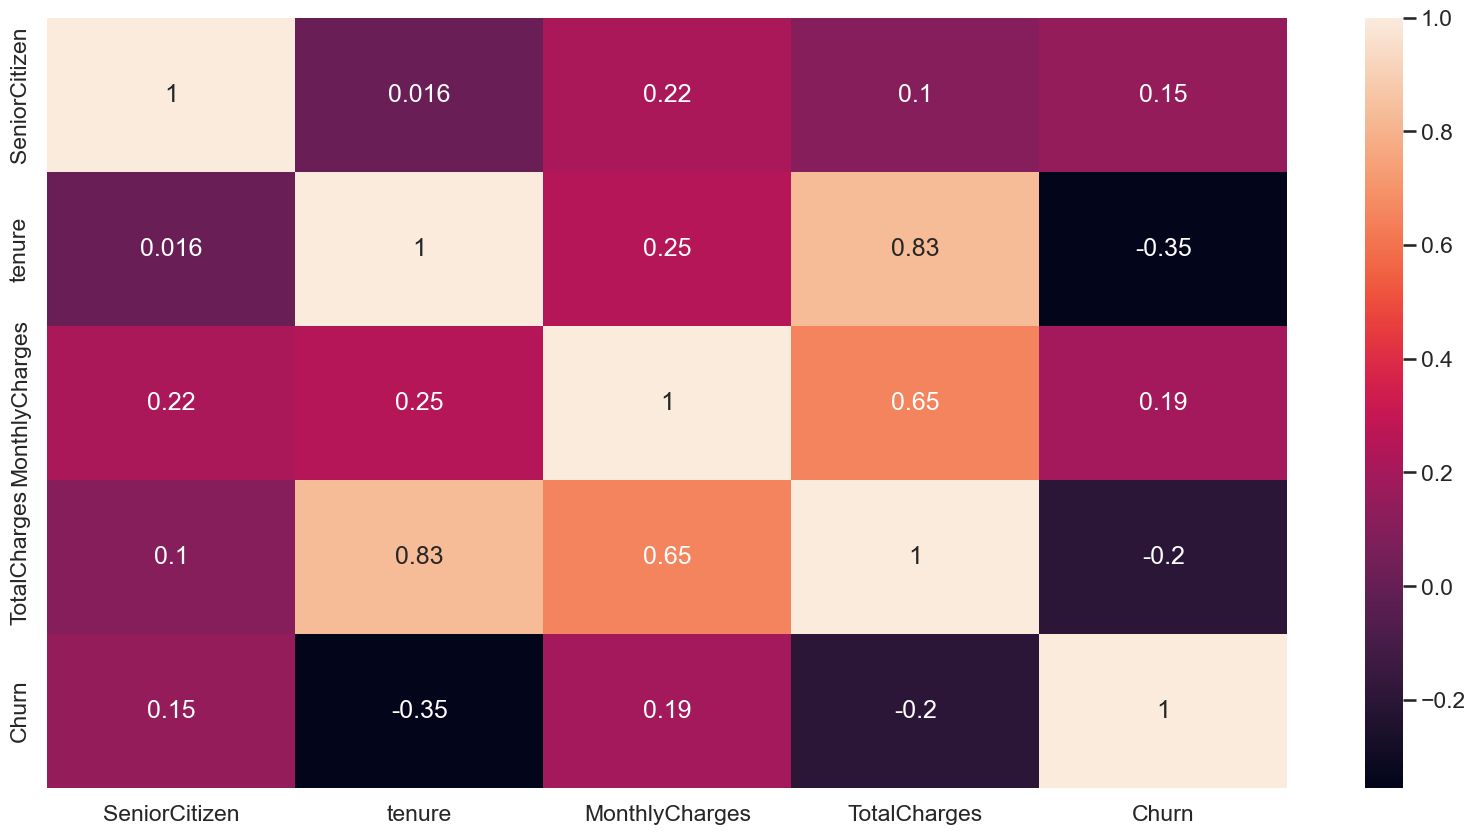

In [52]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
### addd before get dummies

### Bivariate Analysis

In [40]:
newdf0=df.loc[df["Churn"]==0]
newdf1=df.loc[df["Churn"]==1]

In [53]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue, palette=colors) 
        
    plt.show()

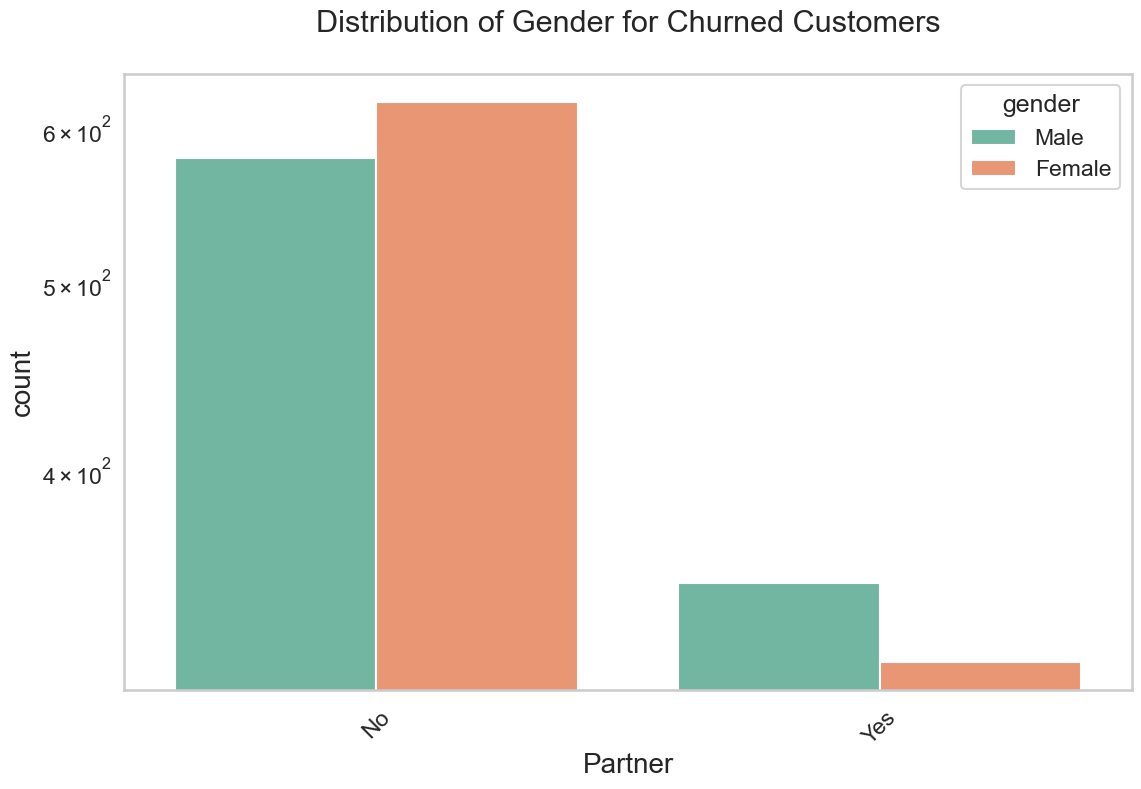

In [54]:
uniplot(newdf1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

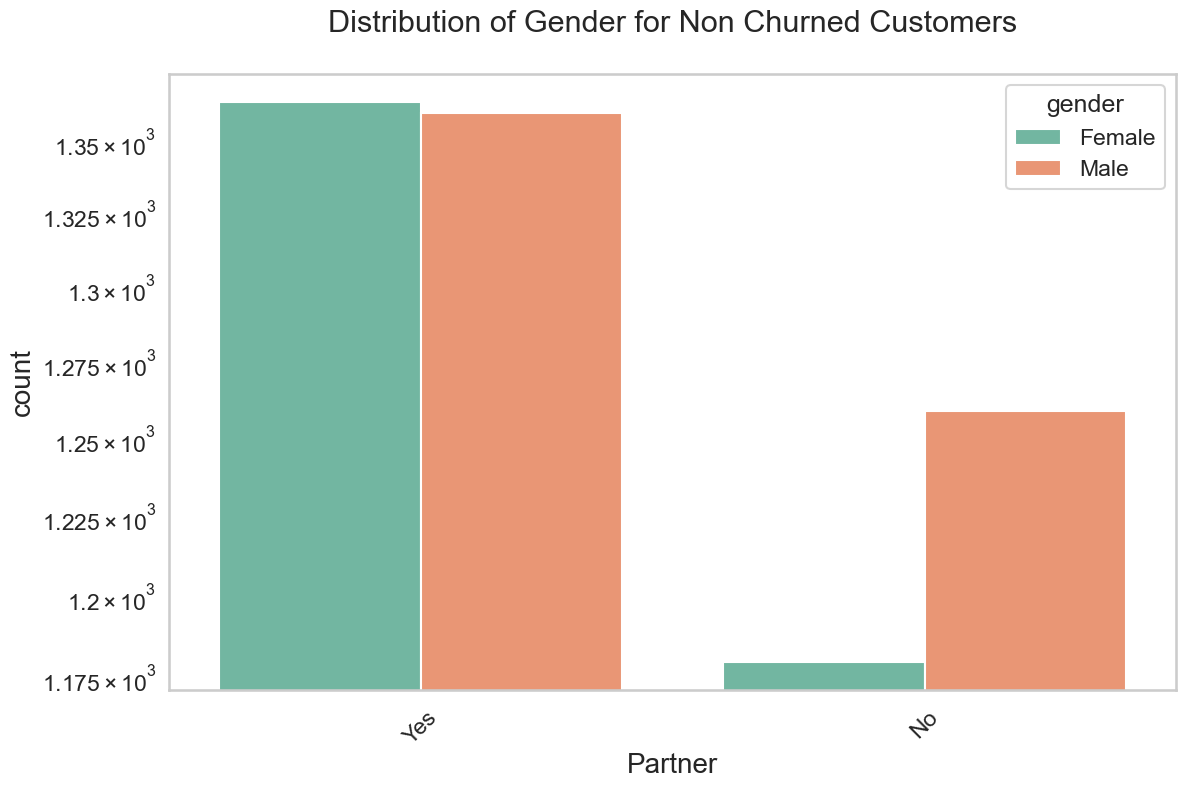

In [55]:
uniplot(newdf0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

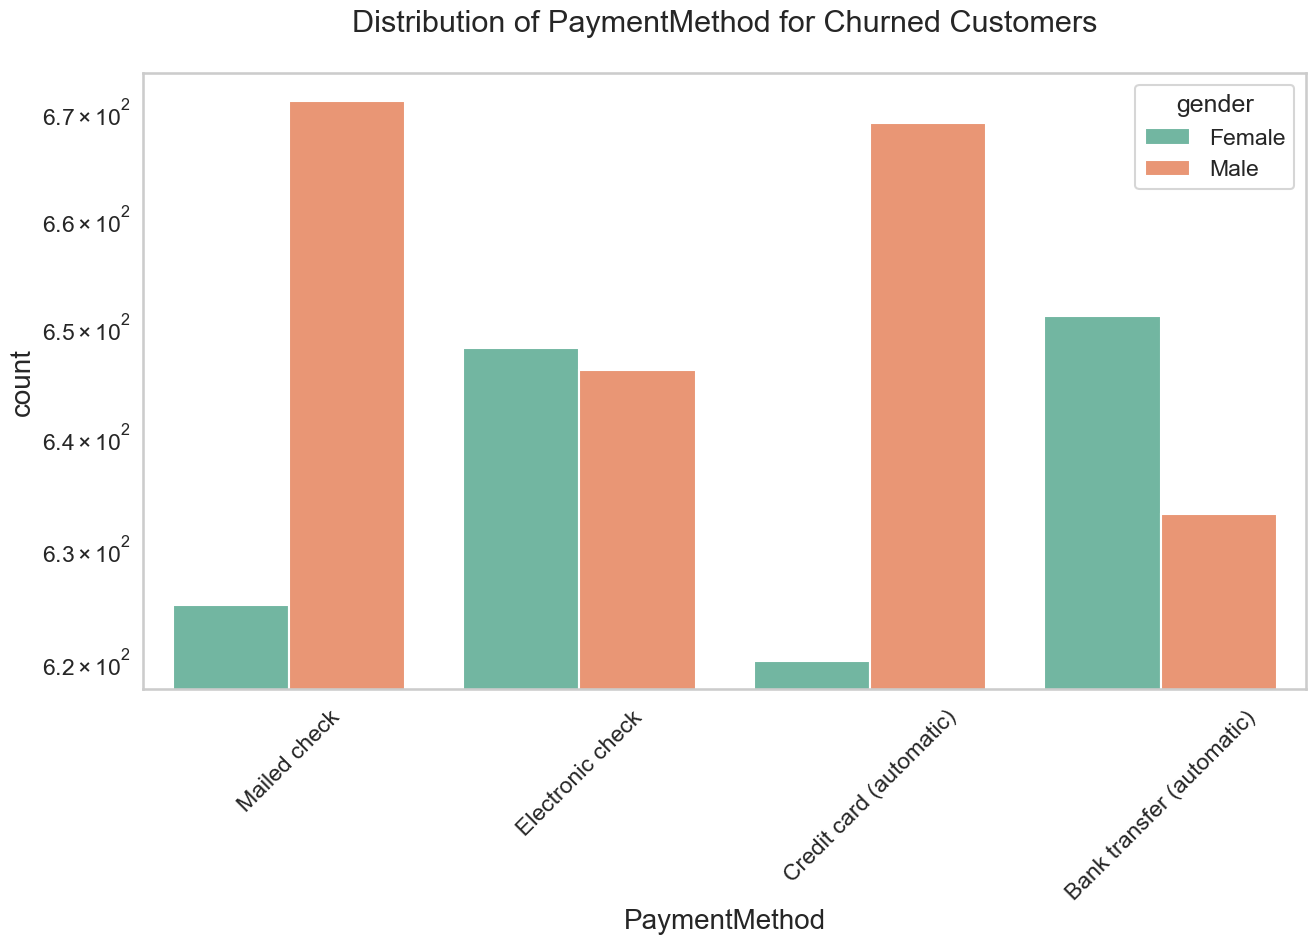

In [56]:
uniplot(newdf0,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

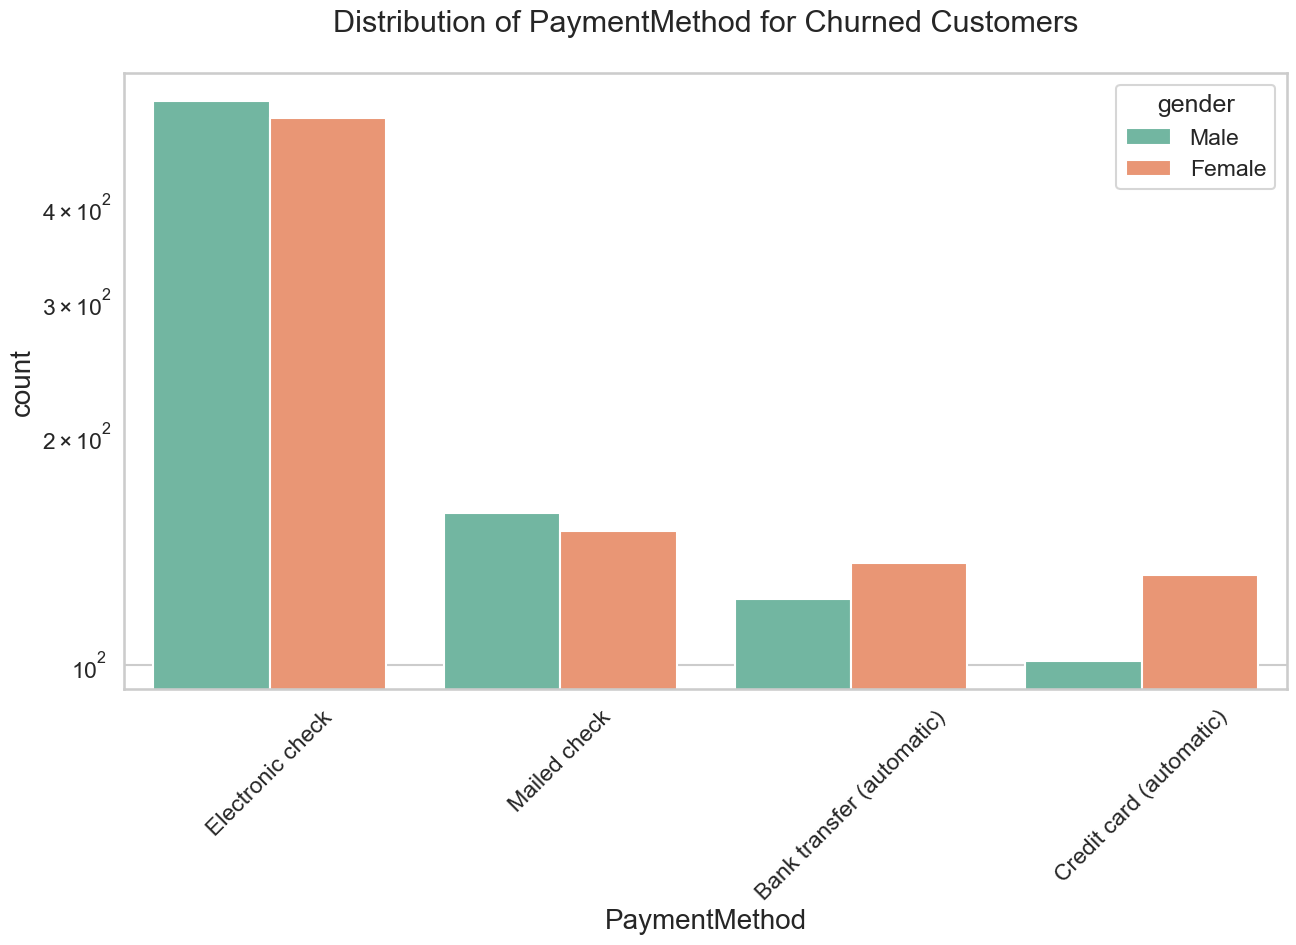

In [57]:
uniplot(newdf1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

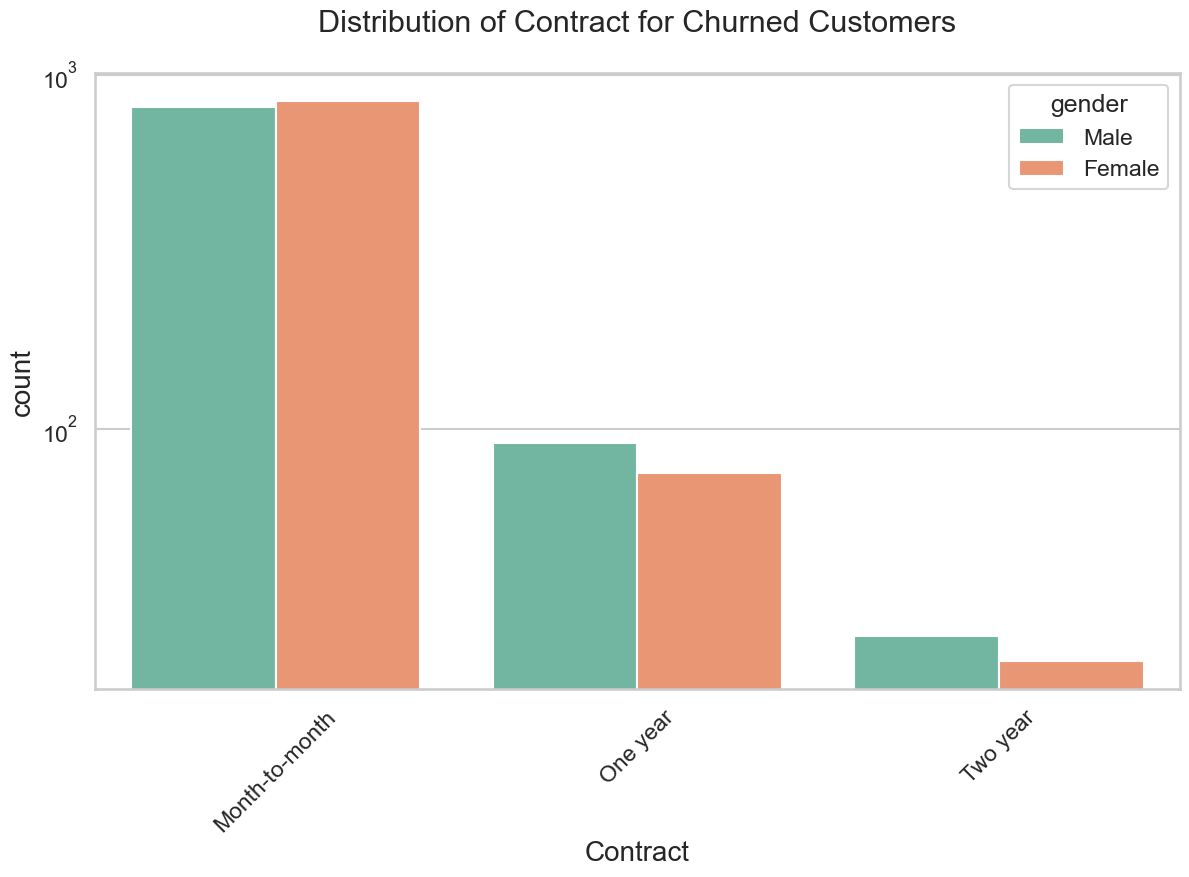

In [58]:
uniplot(newdf1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

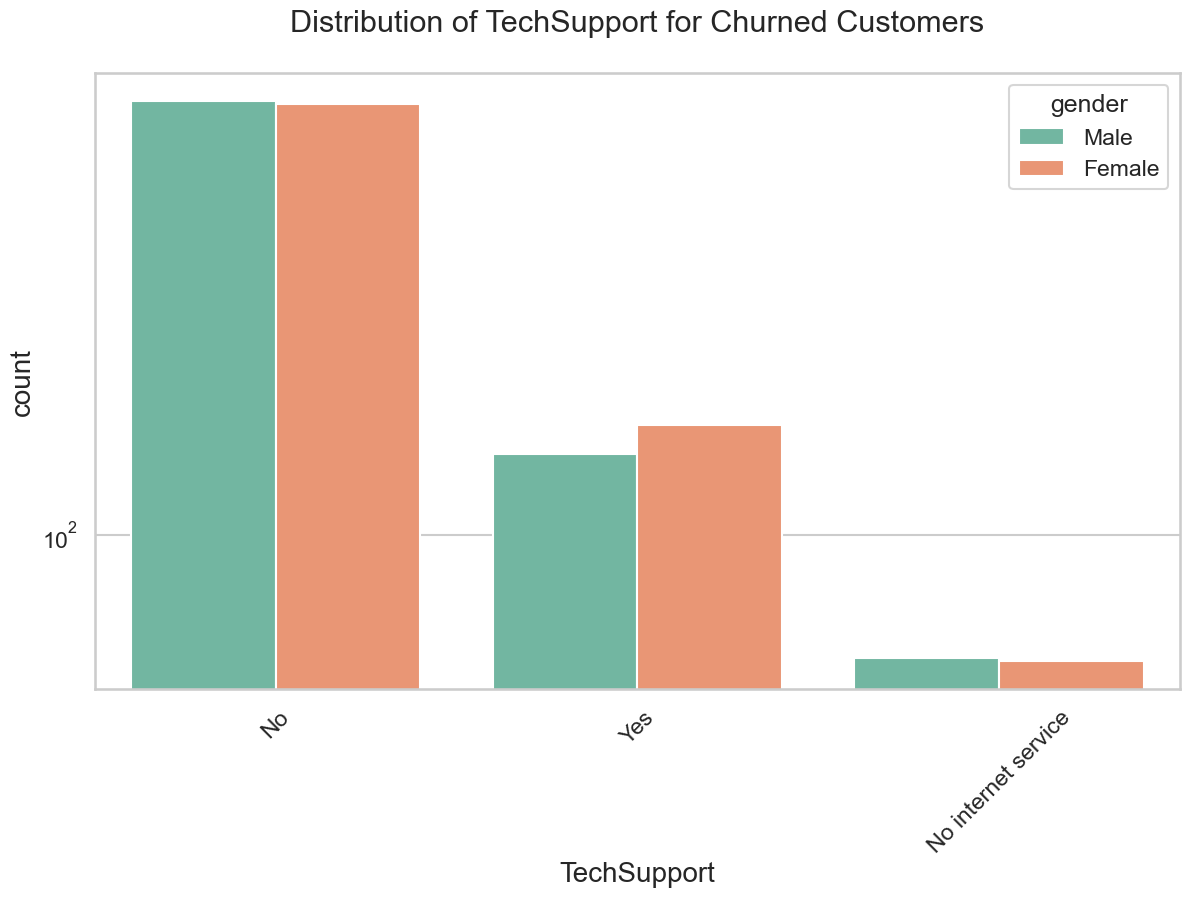

In [59]:
uniplot(newdf1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

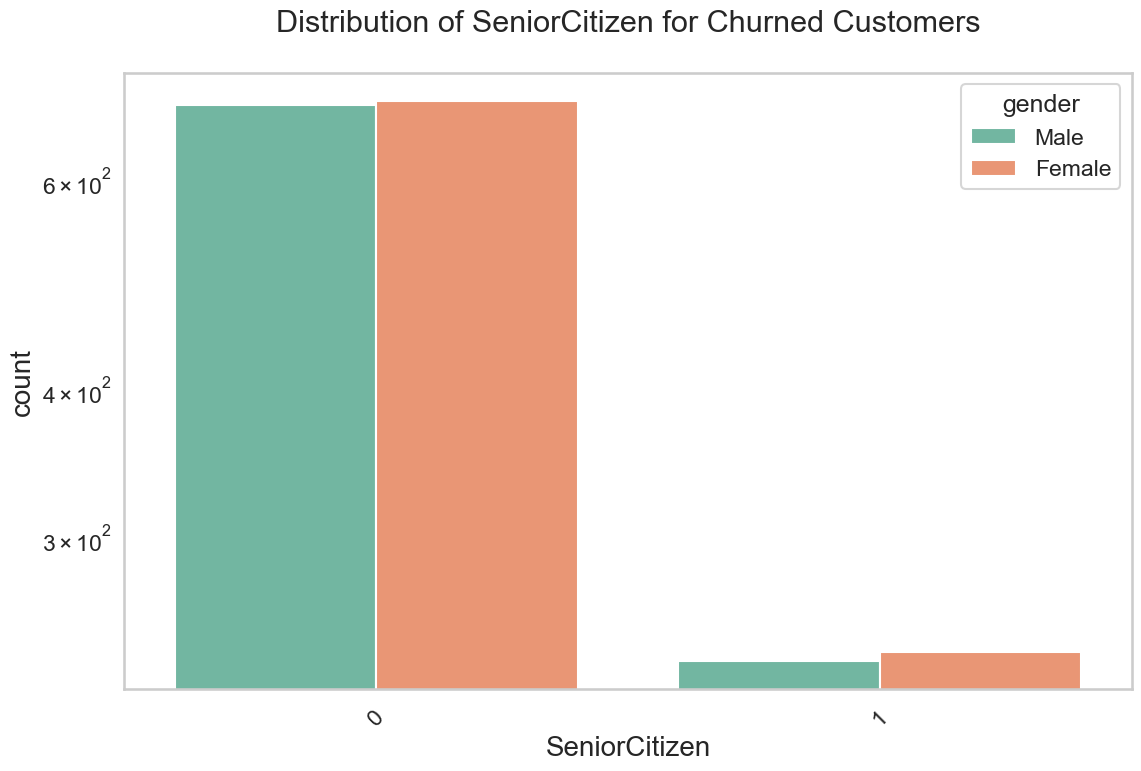

In [60]:
uniplot(newdf1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

# CONCLUSION

These are some of the quick insights from this exercise:

1. Electronic check medium are the highest churners
2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
3. No Online security, No Tech Support category are high churners
4. Non senior Citizens are high churners

Note: There could be many more such insights, so take this as an assignment and try to get more insights :)

In [ ]:
df.to_csv('telcom_new_eda.csv',index = None)